In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('subscription.csv')
data.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


In [4]:
data.subscription_signup_date.unique()

array(['January, 2015'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
user_id                      500000 non-null int64
subscription_signup_date     500000 non-null object
subscription_monthly_cost    500000 non-null int64
country                      500000 non-null object
source                       500000 non-null object
billing_cycles               500000 non-null int64
is_active                    500000 non-null int64
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


# Calculate retention rate by the end of each billing cycle for users of different subscription cost

If we use current active users/active users in the last billing cycle to calculate retention rate:


In [11]:
def retention_rate(df):
    total_num = len(df)
    rate = []
    for i in [1, 2, 3, 4, 5, 6, 7, 8]:
        rate.append(len(df[df['billing_cycles'] >= i]) / len(df[df['billing_cycles'] >= i-1]))
        
    return pd.Series(rate, index=[1, 2, 3, 4, 5, 6, 7, 8])

# calculate the retention rate for each subscription plan
grouped = data.groupby('subscription_monthly_cost').apply(retention_rate)
grouped

,1,2,3,4,5,6,7,8
subscription_monthly_cost,,,,,,,,
29,1.0,0.607542,0.754636,0.820619,0.858588,0.883564,0.900991,0.917344
49,1.0,0.383666,0.537570,0.649913,0.719664,0.767858,0.802031,0.822201
99,1.0,0.158769,0.441145,0.605524,0.699734,0.747468,0.808637,0.836649


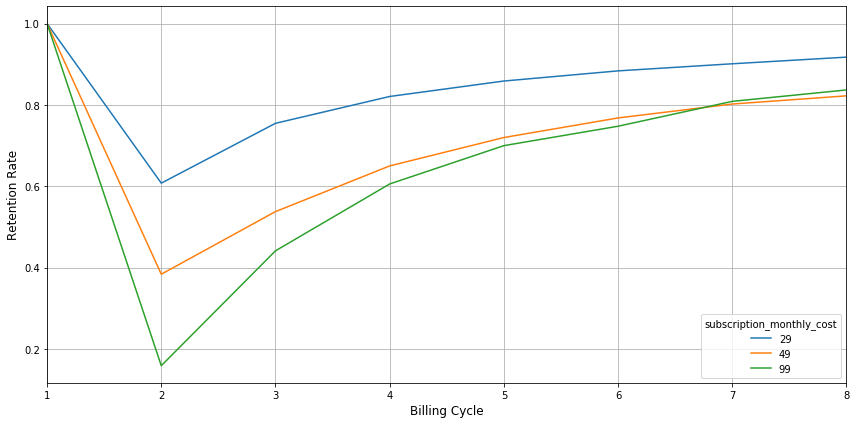

In [12]:
# visualization
fig, ax = plt.subplots(figsize=(12, 6))
grouped.T.plot(kind='line', ax=ax)
ax.set_xlabel('Billing Cycle', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

We can clearly see that the the retention rate in all subscription plans were low in the 2nd billing cycle and bounced back afterwards. Therefore, we should do more investigation on what our users might encounter in the 2nd billing cycle.

# Inspect retention rate by country

In [13]:
# calculate the retention rate for each country
country = data.groupby('country').apply(retention_rate)
country

,1,2,3,4,5,6,7,8
country,,,,,,,,
China,1.0,0.514831,0.782348,0.894853,0.932988,0.951179,0.960070,0.962124
France,1.0,0.334946,0.530629,0.669571,0.743494,0.790418,0.834210,0.851692
Germany,1.0,0.451284,0.616931,0.703671,0.747661,0.786153,0.815173,0.835908
India,1.0,0.446728,0.731904,0.870216,0.919429,0.943171,0.951814,0.961344
Italy,1.0,0.341684,0.525345,0.668036,0.750659,0.790262,0.808649,0.846520
Spain,1.0,0.339098,0.527827,0.669771,0.739477,0.790371,0.822335,0.841821
UK,1.0,0.458938,0.621290,0.694646,0.754399,0.785405,0.815762,0.830357
US,1.0,0.456509,0.622672,0.699559,0.750726,0.786403,0.808153,0.832472


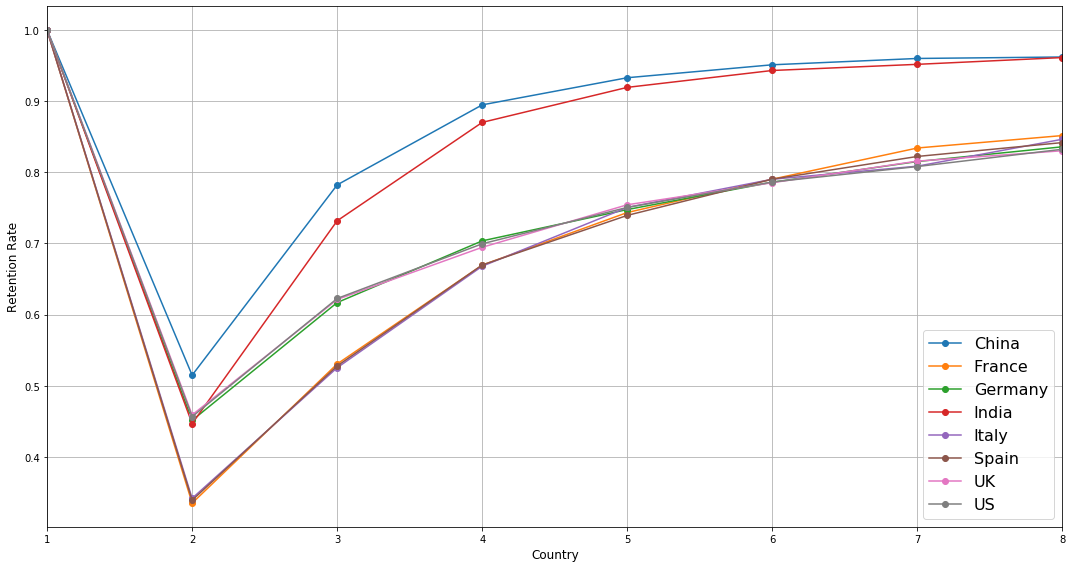

In [15]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
country.T.plot(kind='line', marker='o', ax=ax)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()

We can still see an abrupt decrease in retention rate in the 2nd cycle. But generally speaking, users in China and India have higher retention rate than users in other countries.

# Inspect retention rate by source

In [16]:
source = data.groupby('source').apply(retention_rate)
source

,1,2,3,4,5,6,7,8
source,,,,,,,,
ads,1.0,0.388873,0.571121,0.687130,0.753300,0.800659,0.833914,0.862949
friend_referral,1.0,0.699443,0.882184,0.909640,0.926191,0.937948,0.945680,0.946644
seo,1.0,0.562395,0.746828,0.803772,0.847925,0.865931,0.882213,0.889313


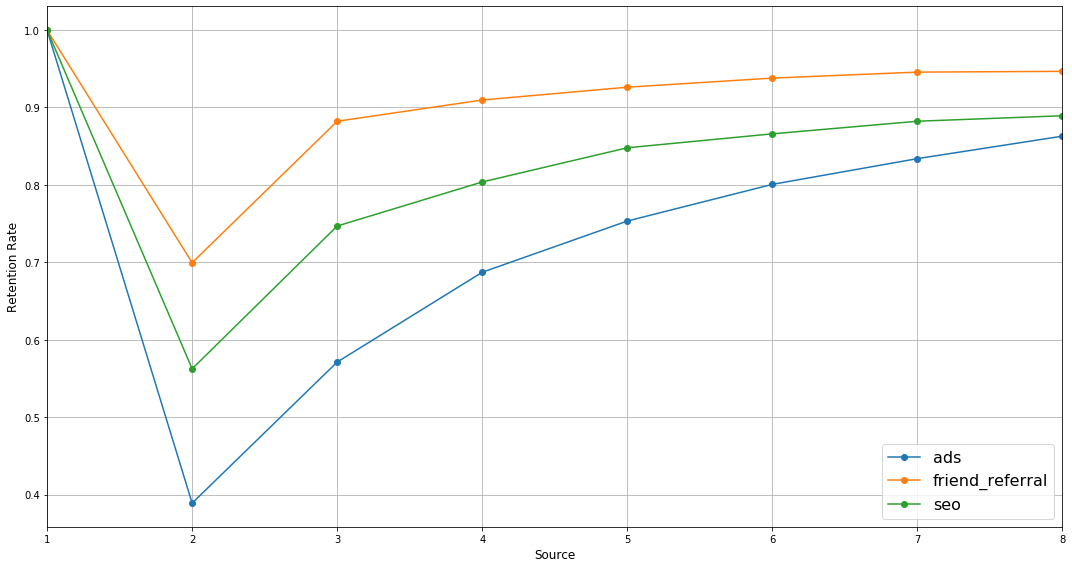

In [17]:
# visualization
fig, ax = plt.subplots(figsize=(15, 8))
source.T.plot(kind='line', marker='o', ax=ax)
ax.set_xlabel('Source', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=16)
plt.tight_layout()
plt.show()

We can see that friend referral brought the users with the highest retention rate and the retention drop in the 2nd cycle for referral users were not that steep compared with other users. However, users from ads were the most likely to churn from subscription.